# Level-1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the audio file
sampling_frequency, signal = wavfile.read('test_sound.wav')

In [3]:
# Display the params
print('\nSignal shape:', signal.shape)
print('Signal duration:', round(signal.shape[0] / float(sampling_frequency), 2), 'seconds')


Signal shape: (268237, 2)
Signal duration: 33.53 seconds


In [4]:
# Normalize the signal
signal = signal / np.power(2, 15)
# Extract the first 25 values
signal = signal[:25]
# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_frequency)

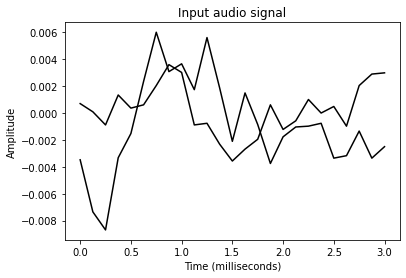

In [5]:
# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Input audio signal')
plt.show()

# Level-2


Signal shape: (3901,)
Signal duration: 0.49 seconds


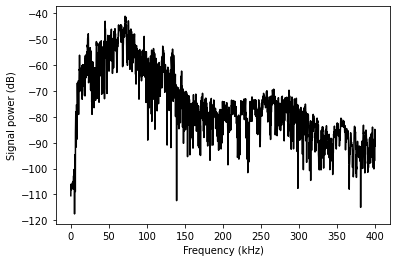

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import warnings
warnings.filterwarnings("ignore")

# Read the audio file
#sampling_freq, signal = wavfile.read('spoken_word.wav')

sampling_freq, signal = wavfile.read('banana03.wav')
print('\nSignal shape:', signal.shape)
print('Signal duration:', round(signal.shape[0] / float(sampling_freq), 2), 'seconds')

# Normalize the values
signal = signal / np.power(2, 15) 

# Extract the length of the audio signal
len_signal = len(signal)

# Extract the half length
len_half = np.ceil((len_signal + 1) / 2.0).astype(np.int)

# Apply Fourier transform
freq_signal = np.fft.fft(signal)

# Normalization
freq_signal = abs(freq_signal[0:len_half]) / len_signal

# Take the square
freq_signal **= 2

# Extract the length of the frequency transformed signal
len_fts = len(freq_signal)

# Adjust the signal for even and odd cases
if len_signal % 2:
    freq_signal[1:len_fts] *= 2
else:
    freq_signal[1:len_fts-1] *= 2

# Extract the power value in dB
signal_power = 10 * np.log10(freq_signal)

# Build the X axis
x_axis = np.arange(0, len_half, 1) * (sampling_freq / len_signal) / 10.0

# Plot the figure
plt.figure()
plt.plot(x_axis, signal_power, color='black')
plt.xlabel('Frequency (kHz)')
plt.ylabel('Signal power (dB)')
plt.show()

# Level-3

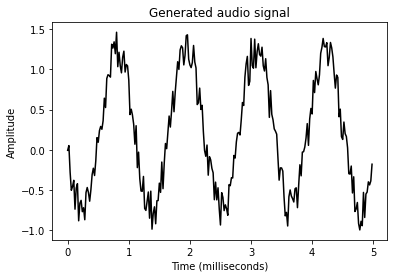

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import write

# Output file where the audio will be saved 
output_file = 'defined_audio.wav'

# Specify audio parameters
duration = 20  # in seconds
sampling_freq = 50000  # in Hz
tone_freq = 700 
min_val = -4 * np.pi
max_val = 4 * np.pi

# Generate the audio signal
t = np.linspace(min_val, max_val, duration * sampling_freq)
signal = np.sin(2 * np.pi * tone_freq * t)

# Add some noise to the signal
noise = 0.5 * np.random.rand(duration * sampling_freq)
signal += noise

# Scale it to 16-bit integer values
scaling_factor = np.power(2, 15) - 1
signal_normalized = signal / np.max(np.abs(signal))
signal_scaled = np.int16(signal_normalized * scaling_factor)

# Save the audio signal in the output file 
write(output_file, sampling_freq, signal_scaled)

# Extract the first 250 values from the audio signal 
signal = signal[:250]

# Construct the time axis in milliseconds
time_axis = 1000 * np.arange(0, len(signal), 1) / float(sampling_freq) 

# Plot the audio signal
plt.plot(time_axis, signal, color='black')
plt.xlabel('Time (milliseconds)')
plt.ylabel('Amplitude')
plt.title('Generated audio signal')
plt.show()
